# Wrangle Act

In this notebook we will work through the Project on Data Wrangling of the udacity course Data Analyst.

The goal is to gather further data via the Twitter API, assess the data and find at least 8 quality issues and at least 2 tidiness issues and finally clean these issues. The result will be saved into a .csv file. Afterwards the data will be analyzed and as Conclusion there will be 3 insights from the data mentioned and at least 1 visualization. Therefore the notebook will be structured the following way:

1. Gathering
2. Assessing
3. Cleaning
4. Storing
5. Analysis
6. Conclusion

## 1. Gathering

In this step we will load the csv file from the course `twitter_archive_enhanced.csv` into a data set, then importing further data via the `requests` library from the Udacity server. Finally we will connect to the twitter API in order to get additional data to the tweets in the database.

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Creating dataframe out of provided csv file
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Downloading via requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image = requests.get(url)

In [4]:
#Saving to file
with open (os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(image.content)

In [5]:
#Creating dataframe out of downloaded tsv file
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')

In [6]:
#Using tweepy to connect to the Twitter API and download further data
df.shape

(2356, 17)

In [7]:
tweet_ids = df.tweet_id

In [8]:
consumer_key = 'placeholder'
consumer_secret = 'placeholder'
access_token = 'placeholder'
access_secret = 'placeholder'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
#Creating a for loop over all `tweet_ids` and storing them in a json file `tweet_json` also storing all rate limit errors (88) in a list `errors_ids`
data = {}
error_ids = []
data['tweets'] = []
for i in range(tweet_ids.shape[0]):
    try:
        start = time.time()
        tweet_id = tweet_ids[i]
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        data['tweets'].append(tweet)
        print(tweet_id)
        end = time.time()
        print(i, ". Time:", end - start)
    except tweepy.TweepError as error:
        print(tweet_id, error.response.text)
        #error 88 descripes rate limit exceeded
        if '88' in error.response.text:
            error_ids.append(tweet_id)
        
with open('tweet_json.txt', 'w') as outfile:
    json.dump(data, outfile)

892420643555336193
0 . Time: 0.3198421001434326
892177421306343426
1 . Time: 0.2571725845336914
891815181378084864
2 . Time: 0.2600705623626709
891689557279858688
3 . Time: 0.28690052032470703
891327558926688256
4 . Time: 0.28687238693237305
891087950875897856
5 . Time: 0.26004767417907715
890971913173991426
6 . Time: 0.25801944732666016
890729181411237888
7 . Time: 0.2500040531158447
890609185150312448
8 . Time: 0.25837206840515137
890240255349198849
9 . Time: 0.24405670166015625
890006608113172480
10 . Time: 0.24785780906677246
889880896479866881
11 . Time: 0.31182050704956055
889665388333682689
12 . Time: 0.37985801696777344
889638837579907072
13 . Time: 0.355989933013916
889531135344209921
14 . Time: 0.27121424674987793
889278841981685760
15 . Time: 0.27128052711486816
888917238123831296
16 . Time: 0.2704334259033203
888804989199671297
17 . Time: 0.2899758815765381
888554962724278272
18 . Time: 0.25188565254211426
888202515573088257 {"errors":[{"code":144,"message":"No status found

Rate limit reached. Sleeping for: 219


832040443403784192
343 . Time: 224.40759897232056
832032802820481025
344 . Time: 0.26505422592163086
831939777352105988
345 . Time: 0.26026177406311035
831926988323639298
346 . Time: 0.23988080024719238
831911600680497154
347 . Time: 0.26000213623046875
831670449226514432
348 . Time: 0.2579381465911865
831650051525054464
349 . Time: 0.25003623962402344
831552930092285952
350 . Time: 0.2690856456756592
831322785565769729
351 . Time: 0.2529010772705078
831315979191906304
352 . Time: 0.2570230960845947
831309418084069378
353 . Time: 0.2648336887359619
831262627380748289
354 . Time: 0.26784563064575195
830956169170665475
355 . Time: 0.23986339569091797
830583320585068544
356 . Time: 0.26398324966430664
830173239259324417
357 . Time: 0.2611978054046631
830097400375152640
358 . Time: 0.24908137321472168
829878982036299777
359 . Time: 0.25507211685180664
829861396166877184
360 . Time: 0.2628896236419678
829501995190984704
361 . Time: 0.265214204788208
829449946868879360
362 . Time: 0.25309395

Rate limit reached. Sleeping for: 570


711968124745228288
1243 . Time: 575.4037261009216
711743778164514816
1244 . Time: 0.27784132957458496
711732680602345472
1245 . Time: 0.2572143077850342
711694788429553666
1246 . Time: 0.27826619148254395
711652651650457602
1247 . Time: 0.2668461799621582
711363825979756544
1248 . Time: 0.2468583583831787
711306686208872448
1249 . Time: 0.25585508346557617
711008018775851008
1250 . Time: 0.24139904975891113
710997087345876993
1251 . Time: 0.2728748321533203
710844581445812225
1252 . Time: 0.2468585968017578
710833117892898816
1253 . Time: 0.24686002731323242
710658690886586372
1254 . Time: 0.2808380126953125
710609963652087808
1255 . Time: 0.24588823318481445
710588934686908417
1256 . Time: 0.2428741455078125
710296729921429505
1257 . Time: 0.27983665466308594
710283270106132480
1258 . Time: 0.26214098930358887
710272297844797440
1259 . Time: 0.24309515953063965
710269109699739648
1260 . Time: 0.23909306526184082
710153181850935296
1261 . Time: 0.25385403633117676
710140971284037632
12

Rate limit reached. Sleeping for: 636


669970042633789440
2143 . Time: 641.390382528305
669942763794931712
2144 . Time: 0.4432535171508789
669926384437997569
2145 . Time: 0.2993612289428711
669923323644657664
2146 . Time: 0.4120814800262451
669753178989142016
2147 . Time: 0.6496667861938477
669749430875258880
2148 . Time: 0.679060697555542
669684865554620416
2149 . Time: 0.4728081226348877
669683899023405056
2150 . Time: 0.5505144596099854
669682095984410625
2151 . Time: 4.1071648597717285
669680153564442624
2152 . Time: 1.5719926357269287
669661792646373376
2153 . Time: 1.3058085441589355
669625907762618368
2154 . Time: 0.8628640174865723
669603084620980224
2155 . Time: 3.633157968521118
669597912108789760
2156 . Time: 1.6545493602752686
669583744538451968
2157 . Time: 0.3788919448852539
669573570759163904
2158 . Time: 0.7215864658355713
669571471778410496
2159 . Time: 0.6123640537261963
669567591774625800
2160 . Time: 0.5124070644378662
669564461267722241
2161 . Time: 0.45189642906188965
669393256313184256
2162 . Time: 0.

In [10]:
#Since some of the errors were due to rate limit exceeded (88) we run the loop again over these errors in order to catch the tweets that were exluded due to rate limit
#This didn't happen every time so error_id could be empty and the following does nothing (since we got already everything)
error_ids2 = []
for i in range(len(error_ids)):
    try:
        start = time.time()
        tweet_id = error_ids[i]
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        data['tweets'].append(tweet)
        print(tweet_id)
        end = time.time()
        print(i, ". Time:", end - start)
    except tweepy.TweepError as error:
        print(tweet_id, error.response.text)
        if error.response.text['code'] == 88:
            error_ids2.append(tweet_id)
        
with open('tweet_json.txt', 'w') as outfile:
    json.dump(data, outfile)

Creating a list out of the json file with the needed information `id`, `retweet_count` (retweets), `favorite_count` (likes)

In [8]:
json_list = []

In [9]:
with open ('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for t in range(len(data['tweets'])):
        json_list.append({'id' : data['tweets'][t]['id'],
                         "retweets" : data['tweets'][t]["retweet_count"],
                         "likes" : data['tweets'][t]["favorite_count"]})
        


In [10]:
#Creating a dataframe out of the list
df_json = pd.DataFrame.from_dict(json_list)

## 2. Assessing

In this part we will assess the gathered data in order to find quality and tidiness issues

We start with `df`

In [11]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df.shape

(2356, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
#Looking at all the entries which have a value in `in_reply_to_status_id`
df[~df.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [15]:
#Looking at all the entries which have a value in `retweeted_status_id`
df[~df.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [16]:
#Looking at `doggo` with a value
df[df.doggo != 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,None,None,None
1141,727644517743104000,NaN,NaN,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727644517...,13,10,None,doggo,None,None,None
1156,724771698126512129,NaN,NaN,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724771698...,11,10,None,doggo,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None


In [17]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
df.query('rating_numerator > 15')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


Next we look at `df_image`

In [19]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
df_image.shape

(2075, 12)

In [21]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
#Looking at images which have first prediction `not a dog`, 2nd prediction `dog` and confidence for the 2nd prediction above 0.25
df_image.query('p1_dog == False & p2_dog == True & p2_conf > 0.25')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
444,674644256330530816,https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg,1,soccer_ball,0.398102,False,basset,0.335692,True,cocker_spaniel,0.072941,True
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
703,684914660081053696,https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg,1,shopping_cart,0.460950,False,chow,0.261288,True,Labrador_retriever,0.074194,True
855,696713835009417216,https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg,1,car_mirror,0.379797,False,Chesapeake_Bay_retriever,0.321589,True,vizsla,0.116931,True
1034,711732680602345472,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True
1046,713175907180089344,https://pbs.twimg.com/media/CeW1tERWAAAA9Q2.jpg,1,timber_wolf,0.503788,False,malamute,0.430624,True,Siberian_husky,0.028454,True
1083,718460005985447936,https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg,1,badger,0.356946,False,Boston_bull,0.252781,True,kelpie,0.113433,True
1197,740676976021798912,https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg,1,wombat,0.462952,False,Norwegian_elkhound,0.275225,True,Siamese_cat,0.043559,False
1361,761227390836215808,https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg,1,cougar,0.306512,False,French_bulldog,0.280802,True,boxer,0.054523,True


In [23]:
df_image[df_image.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


Seems like the duplicated `jpg_url` are retweets

In [24]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Finally we take a look at `df_json`

In [25]:
df_json.head()

,id,retweets,likes
0,892420643555336193,7724,36275
1,892177421306343426,5709,31279
2,891815181378084864,3783,23546
3,891689557279858688,7877,39566
4,891327558926688256,8495,37790


In [26]:
df_json.shape

(2331, 3)

### Quality Issues

1. `df` contains replies, these are not in line with the normal tweets. These replies have a value in `in_reply_to_status_id`
2. `df` contains retweets, these are not in line with the normal tweets. These replies have a value in `retweeted_status_id`
3. `df` has in the column `name` NaN as None
4. `df_image` identifies also other things than dogs
5. `df_image` has lots of low probability predictions
6. `df` some anomalies in the `rating_nominator`
7. `df` `rating_denominator` and `rating_nominator` should rather be `flaot`
8. `df` the denominator `rating_denominator` goes over 10 when there are more dogs in the picture
9. column `source` has no useful information
10. `tweet_id` is `int` and should be `object` since it's a identifier and no calculations will be performed on it

### Tidiness Issues

1. `df_image` doesn't need to be its own table
2. `df_json` doesn't need to be its own table
3. columns `doggo`, `floofer`, `pupper`, `puppo` are all descriptions of the dogs stage. So they should be in one column.

## 3. Cleaning

In [27]:
df_clean = df.copy()
df_image_clean = df_image.copy()
df_json_clean = df_json.copy()

## Quality Issues

### Replies in `df`

`df` contains replies, these are not in line with the normal tweets. These replies have a value in `in_reply_to_status_id`

#### Define

1. Drop all the rows which have values in the `in_reply_to_status_id` column.

2. Afterwards drop the following columns since they don't contain values anymore: `in_reply_to_status_id`, `in_reply_to_user_id`

#### Code 1

In [28]:
df_clean = df_clean[df_clean.in_reply_to_status_id.isnull()]

#### Test 1

In [29]:
#Showing all the rows in which the column `in_reply_to_status_id` has a value 
df_clean[~df_clean.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Code 2

In [30]:
df_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

#### Test 2

In [31]:
df_clean.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Retweets in `df`

`df` contains retweets, these are not in line with the normal tweets. These replies have a value in `retweeted_status_id`

#### Define

1. Drop all the rows which have values in the `retweeted_status_id` column

2. Afterwards drop the following columns since they don't contain values anymore: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`

#### Code 1

In [32]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

#### Test 1

In [33]:
#Showing all the rows in which the column `retweeted_status_id` has a value 
df_clean[~df_clean.retweeted_status_id.isnull()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Code 2

In [34]:
df_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

#### Test 2

In [35]:
df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### `Nan` values are stored as `None` for column `name`

`df` has in the column `name` NaN as None

#### Define
Change all the `None` values in the column `name` into `NaN`

#### Code

In [36]:
df_clean.name.replace('None', np.NaN, inplace = True)

#### Test

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1494 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Rating system

`df` some anomalies in the `rating_nominator`

#### Define
Rereading the values for `rating_numerator` and `rating_denumerator` from the `text` column and replacing the old values of these

Also `tweet_id` 810984652412424192 has no rating (24/7 was not the rating) and will be dropped.

#### Code

In [38]:
rating = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [39]:
df_clean.rating_numerator = rating.rating_numerator
df_clean.rating_denominator = rating.rating_denominator

In [40]:
#getting the index for tweet_id 810984652412424192
drop_index = df_clean.query('tweet_id == 810984652412424192').index

In [41]:
df_clean.drop(drop_index, inplace = True)

In [43]:
df_clean.rating_numerator = df_clean.rating_numerator.astype(float)
df_clean.rating_denominator = df_clean.rating_denominator.astype(float)

#### Test

In [44]:
df_clean.query('tweet_id == 786709082849828864')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,None,None,None,None


In [45]:
df_clean.query('rating_numerator > 14')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70.0,NaN,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,NaN,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,this,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50.0,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99.0,90.0,NaN,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,NaN,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,50.0,NaN,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50.0,a,None,None,None,None
1433,697463031882764288,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44.0,40.0,NaN,None,None,None,None


### Rating system 2

`df` the denominator `rating_denominator` goes over 10 when there are more dogs in the picture

#### Define
Normalize the rating system for multiple dogs. Deviding the `rating_numerator` by the `rating_denominator` and storing the result in a new column `rating_norm`

#### Code

In [46]:
df_clean['rating_norm'] = df_clean.rating_numerator / df_clean.rating_denominator

#### Test

In [47]:
df_clean.describe()

,tweet_id,rating_numerator,rating_denominator,rating_norm
count,2.096000e+03,2096.000000,2096.000000,2096.000000
mean,7.365239e+17,12.142071,10.450382,1.164042
std,6.709809e+16,40.347773,6.646220,3.963869
min,6.660209e+17,0.000000,2.000000,0.000000
25%,6.768177e+17,10.000000,10.000000,1.000000
50%,7.097095e+17,11.000000,10.000000,1.100000
75%,7.874779e+17,12.000000,10.000000,1.200000
max,8.924206e+17,1776.000000,170.000000,177.600000


In [48]:
df_clean.query('rating_norm > 1.4')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_norm
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,None,None,None,None,177.6
2074,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,NaN,None,None,None,None,42.0


### column `source` not useful

column `source` has no useful information

#### Define
Drop the column `source` 

#### Code

In [49]:
df_clean.drop('source', axis = 1, inplace = True)

#### Test

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2096 non-null   int64  
 1   timestamp           2096 non-null   object 
 2   text                2096 non-null   object 
 3   expanded_urls       2093 non-null   object 
 4   rating_numerator    2096 non-null   float64
 5   rating_denominator  2096 non-null   float64
 6   name                1493 non-null   object 
 7   doggo               2096 non-null   object 
 8   floofer             2096 non-null   object 
 9   pupper              2096 non-null   object 
 10  puppo               2096 non-null   object 
 11  rating_norm         2096 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 212.9+ KB


### `tweet_id` as `object`

`tweet_id` is `int` and should be `object` since it's a identifier and no calculations will be performed on it

#### Define
Drop the column `source` 

#### Code

In [51]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2096 non-null   object 
 1   timestamp           2096 non-null   object 
 2   text                2096 non-null   object 
 3   expanded_urls       2093 non-null   object 
 4   rating_numerator    2096 non-null   float64
 5   rating_denominator  2096 non-null   float64
 6   name                1493 non-null   object 
 7   doggo               2096 non-null   object 
 8   floofer             2096 non-null   object 
 9   pupper              2096 non-null   object 
 10  puppo               2096 non-null   object 
 11  rating_norm         2096 non-null   float64
dtypes: float64(3), object(9)
memory usage: 212.9+ KB


## Tidiness Issues

### `df_image` own table

`df_image` doesn't need to be its own table

#### Define
Merge `df` and `df_image` on `tweet_id` in order to create a master dataframe

#### Code

In [53]:
#tweet_id in df_image as object
df_image_clean.tweet_id = df_image_clean.tweet_id.astype(str)

In [54]:
df_clean = pd.merge(df_clean, df_image_clean, on = ['tweet_id'], how = 'left')

#### Test

In [55]:
df_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2096 non-null   object 
 1   timestamp           2096 non-null   object 
 2   text                2096 non-null   object 
 3   expanded_urls       2093 non-null   object 
 4   rating_numerator    2096 non-null   float64
 5   rating_denominator  2096 non-null   float64
 6   name                1493 non-null   object 
 7   doggo               2096 non-null   object 
 8   floofer             2096 non-null   object 
 9   pupper              2096 non-null   object 
 10  puppo               2096 non-null   object 
 11  rating_norm         2096 non-null   float64
 12  jpg_url             1970 non-null   object 
 13  img_num             1970 non-null   float64
 14  p1                  1970 non-null   object 
 15  p1_conf             1970 non-null   float64
 16  p1_dog

### `df_json` own table

`df_json` doesn't need to be its own table

#### Define
In the dataframe `df_json` rename `id` into `tweet_id` 
Merge `df` and `df_json` on `tweet_id` in order to create a master dataframe

#### Code

In [57]:
#rename `id` into `tweet_id`
df_json_clean.rename(columns = {"id" : "tweet_id"}, inplace = True)

In [58]:
#tweet_id in df_json as object
df_json_clean.tweet_id = df_json_clean.tweet_id.astype(str)

In [59]:
df_clean = pd.merge(df_clean, df_json_clean, on = ['tweet_id'], how = 'left')

#### Test

In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2096 non-null   object 
 1   timestamp           2096 non-null   object 
 2   text                2096 non-null   object 
 3   expanded_urls       2093 non-null   object 
 4   rating_numerator    2096 non-null   float64
 5   rating_denominator  2096 non-null   float64
 6   name                1493 non-null   object 
 7   doggo               2096 non-null   object 
 8   floofer             2096 non-null   object 
 9   pupper              2096 non-null   object 
 10  puppo               2096 non-null   object 
 11  rating_norm         2096 non-null   float64
 12  jpg_url             1970 non-null   object 
 13  img_num             1970 non-null   float64
 14  p1                  1970 non-null   object 
 15  p1_conf             1970 non-null   float64
 16  p1_dog

### Merging dog stage

columns `doggo`, `floofer`, `pupper`, `puppo` are all descriptions of the dogs stage. So they should be in one column.

#### Define
Handling the `None` values in the columns

Merge aboves columns into one column called `dog_stage`

Considering multiple dog stages.

#### Code

In [61]:
# handle none
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

# merge into column
df_clean['dog_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

# handle multiple stages
df_clean.loc[df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_clean.loc[df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_clean.loc[df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [65]:
df_clean.dog_stage.value_counts()

                  1760
pupper             221
doggo               72
puppo               23
doggo, pupper        9
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [64]:
df_clean.query('dog_stage == "doggo, pupper"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,likes,dog_stage
358,817777686764523521,2017-01-07 16:59:28 +0000,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10.0,Dido,doggo,,pupper,...,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,2744.0,10915.0,"doggo, pupper"
415,808106460588765185,2016-12-12 00:29:28 +0000,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,NaN,doggo,,pupper,...,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,2255.0,8977.0,"doggo, pupper"
445,801115127852503040,2016-11-22 17:28:25 +0000,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10.0,Bones,doggo,,pupper,...,True,English_setter,0.094602,True,bluetick,0.021953,True,2156.0,8255.0,"doggo, pupper"
535,785639753186217984,2016-10-11 00:34:48 +0000,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10.0,Pinot,doggo,,pupper,...,False,sea_urchin,0.006106,False,echidna,0.005442,False,2284.0,7990.0,"doggo, pupper"
561,781308096455073793,2016-09-29 01:42:20 +0000,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12.0,10.0,NaN,doggo,,pupper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2596.0,7273.0,"doggo, pupper"
688,759793422261743616,2016-07-31 16:50:42 +0000,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10.0,Maggie,doggo,,pupper,...,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,1933.0,6015.0,"doggo, pupper"
747,751583847268179968,2016-07-09 01:08:47 +0000,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10.0,NaN,doggo,,pupper,...,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,1109.0,4419.0,"doggo, pupper"
847,741067306818797568,2016-06-10 00:39:48 +0000,This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12.0,10.0,just,doggo,,pupper,...,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True,3096.0,9504.0,"doggo, pupper"
896,733109485275860992,2016-05-19 01:38:16 +0000,"Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12.0,10.0,NaN,doggo,,pupper,...,True,Labrador_retriever,0.042319,True,doormat,0.003956,False,16805.0,50059.0,"doggo, pupper"


## 4. Storing

The final dataframe will be stored in a .csv file called `twitter_archive_master.csv`

In [68]:
df_clean.to_csv('twitter_archive_master.csv', index = False)

## 5. Analysis

In [69]:
df_clean.describe()

,rating_numerator,rating_denominator,rating_norm,img_num,p1_conf,p2_conf,p3_conf,retweets,likes
count,2096.000000,2096.000000,2096.000000,1970.000000,1970.000000,1.970000e+03,1.970000e+03,2089.000000,2089.000000
mean,12.142071,10.450382,1.164042,1.202030,0.594417,1.346347e-01,6.018299e-02,2528.171374,8366.282910
std,40.347773,6.646220,3.963869,0.559144,0.272124,1.010543e-01,5.094862e-02,4426.431506,12158.144705
min,0.000000,2.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,72.000000
25%,10.000000,10.000000,1.000000,1.000000,0.363008,5.351907e-02,1.606823e-02,560.000000,1858.000000
50%,11.000000,10.000000,1.100000,1.000000,0.587635,1.173995e-01,4.945765e-02,1226.000000,3826.000000
75%,12.000000,10.000000,1.200000,1.000000,0.847216,1.955693e-01,9.155482e-02,2876.000000,10449.000000
max,1776.000000,170.000000,177.600000,4.000000,1.000000,4.880140e-01,2.734190e-01,77970.000000,156488.000000


The average rating normalized is 1.16 with the first quantil ranging from 0 till 1 the 2nd till 1.1 and the third till 1.2.

In [70]:
df_clean.query('rating_norm > 1.5')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,likes,dog_stage
769,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,,,,...,False,sunglasses,0.080822,False,sunglass,0.050776,False,2477.0,5145.0,
1820,670842764863651840,2015-11-29 05:52:33 +0000,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,NaN,,,,...,False,accordion,0.094075,False,drumstick,0.061113,False,8338.0,23793.0,


It is seems to be very helpful to be either Snoop Dogg (rating 420/10) or being very American to get a rating of 1776/10

In order to plot these two outliers will be removed.

In [74]:
df_plt = df_clean.copy()

In [78]:
drop1 = df_plt.query('rating_numerator == 1776').index[0]

In [77]:
drop2 = df_plt.query('rating_numerator == 420').index[0]

In [79]:
df_plt.drop([drop1, drop2], inplace = True)

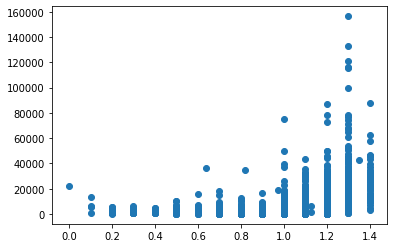

In [80]:
plt.scatter(df_plt.rating_norm, df_plt.likes);

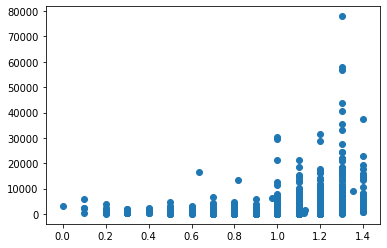

In [81]:
plt.scatter(df_plt.rating_norm, df_plt.retweets);

Over all there seems to be a positive correlation between a higher normalized rating and likes as well as retweets.

Analysing a subset of the dataframe in which the neuralnet was able to identify a dog as the first item with a confidence above 50%:

In [82]:
df_p1dog = df_clean.query('p1_dog == True & p1_conf > 0.5')

In [83]:
df_p1dog.shape

(928, 26)

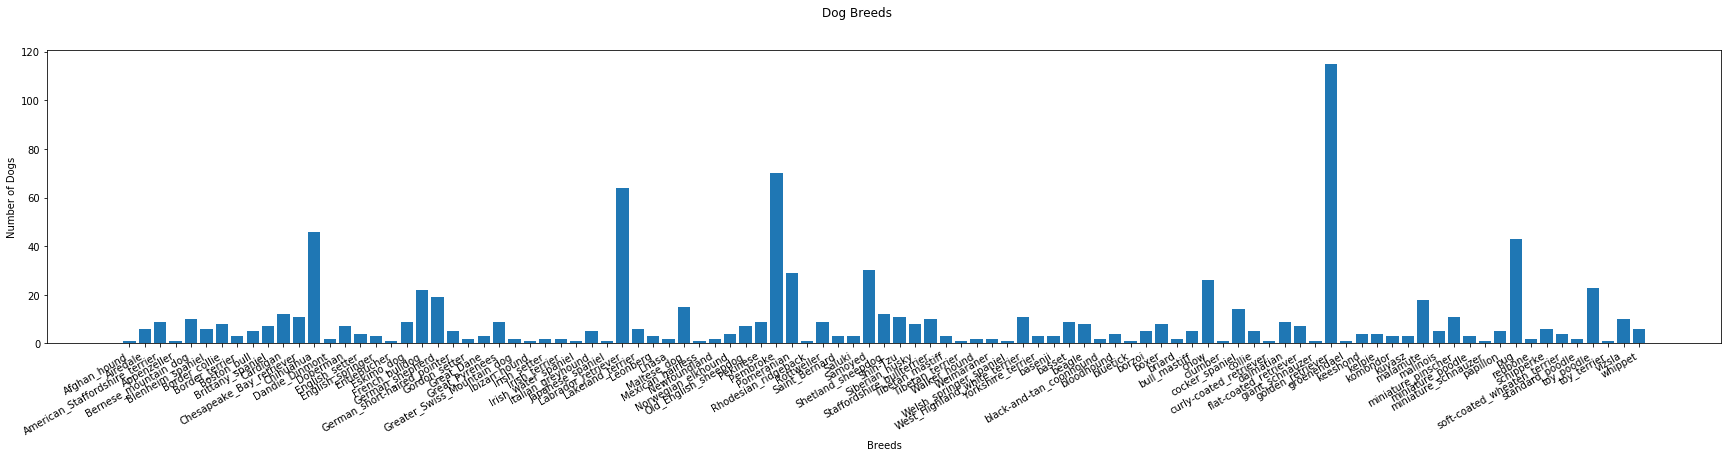

In [84]:
#Creating a graph for all the breeds
#dog breeds as labels
labels = df_p1dog.p1.unique()
labels.sort()
#number of dogs per breed as values
values = df_p1dog.groupby('p1')['tweet_id'].count()

fig, ax = plt.subplots(figsize=(30,6))
fig.suptitle('Dog Breeds')

ax.bar(labels, values)
ax.set_ylabel('Number of Dogs')
ax.set_xlabel('Breeds')
fig.autofmt_xdate();

The neural net was able to identify the breed of 928 dogs with a confidence above 50%. The graph above shows the distribution of the breeds. Since this is hard to read we will plot the top 10 breeds:

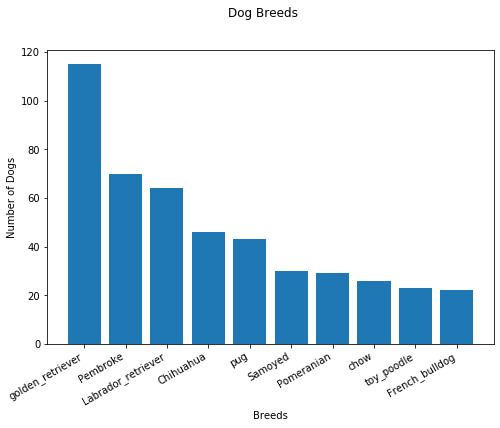

In [85]:
#Creating a graph for the top 10 breeds
#number of dogs per breed as values
values = df_p1dog.p1.value_counts()[:10]

#dog breeds as labels
labels = values.index

fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('Dog Breeds')

ax.bar(labels, values)
ax.set_ylabel('Number of Dogs')
ax.set_xlabel('Breeds')
fig.autofmt_xdate();

In [88]:
#Number of dogs in the top 10
sum(values)

468

## 6. Conclusion

The famous WeRateDogs twitter account rates, like the name suggests, dogs. But who are the best rated dogs ever? Are better rated dogs more retweeted and get more likes than dogs not rated that high? I answered these questions analyzing over 5000 tweets from the years 2015 till 2017. After drilling down on these tweets there were still over 2000 tweets which provided a rating for the displayed dogs.

We saw in the graphs that likes/retweets are positivly correalted with rating.

Further more the most breeds (which got recognized by the neural net with a confidence >50%) are Golden retrievers followed by Pembroke, Labrador Retrievers, Chihuahuas and Pugs.

Finally the best rated dog is "American af" with a rating of 1776 and Snoop Dogg with a rating of 420.